In [1]:
%matplotlib inline
import orbipy as op
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from copy import copy
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp1d

In [2]:
model = op.crtbp3_model()
precise_model = op.crtbp3_model()
precise_model.integrator.set_params(max_step=np.pi/180)
stm_model = op.crtbp3_model(stm=True)

In [3]:
plotter = op.plotter.from_model(model, length_units='nd', velocity_units='nd/nd')
scaler = plotter.scaler

Событие EventYCondXG (Event Y with Condition X Greater than) - событие op.eventY с условием. Если условие выполняется, то ведет себя как eventY, если не выполняется - возвращает число сильно отличающееся от value.

In [4]:
class EventYCondXG(op.eventY):
    def __init__(self, cond_value, *args, **kwargs):
        self.cond_value = copy(cond_value)
        super().__init__(*args, **kwargs)
        
    def __call__(self, t, s):
        if s[0] > self.cond_value:
            return s[1] - self.value
        else:
            return self.value + 10

In [5]:
EL1_dist = 1.-model.mu - model.L1

In [6]:
with open('init_coord.bin', 'rb') as data:
    s0 = pickle.load(data)

In [7]:
v0 = (0.02+0.03)/2+0.000524

In [8]:
ileft = op.eventX(model.L1-EL1_dist-scaler(50000,'km-nd'))
iright = EventYCondXG(cond_value=1.-model.mu, value = 0)

In [9]:
det = op.event_detector(precise_model, events = [ileft, iright])

### Корректное поведение события

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e3f3550b8>,
      dtype=object)

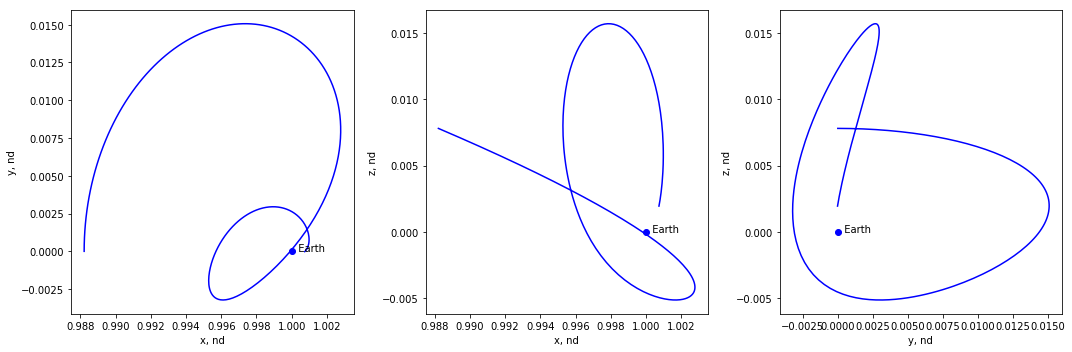

In [20]:
s1 = s0.copy()
s1[4] = 0.026
df, ev = det.prop(s1 ,0.0, 12)
ax = plotter.plot_proj(df)
plotter.plot_proj(ax=ax, plottables=[plotter.m], marker='o') # использование интегратора с шагом в 1 день не помогает

### Некорректное поведение события

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e42bfbba8>,
      dtype=object)

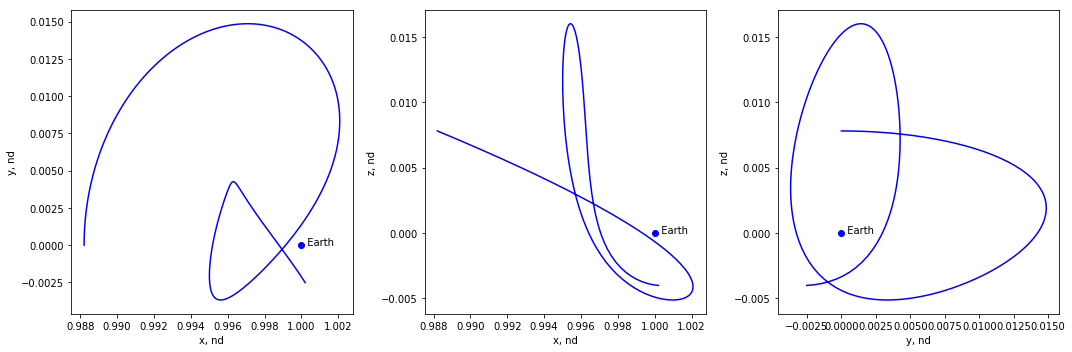

In [10]:
s1 = s0.copy()
s1[4] = v0
df, ev = det.prop(s1 ,0.0, 12)
ax = plotter.plot_proj(df)
plotter.plot_proj(ax=ax, plottables=[plotter.m], marker='o') # использование интегратора с шагом в 1 день не помогает

### Дальнейшее поведение траектории

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e42a5b9e8>,
      dtype=object)

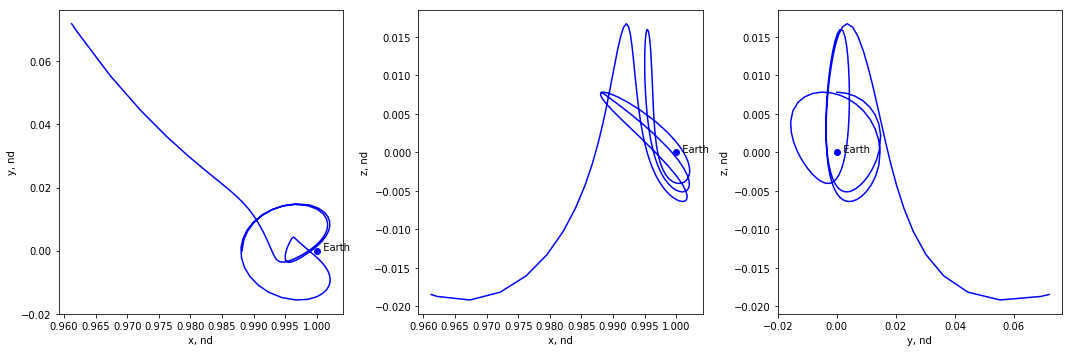

In [11]:
df2 = model.prop(s1, 0.0, 4*np.pi)
ax = plotter.plot_proj(df2)
plotter.plot_proj(ax=ax, plottables=[plotter.m], marker='o')